<h1>Fandango Rating Analysis:<h1>
<h2>A followup to Hickey's research findings<h2>
<h3>In this project we will attempt to determine if the Fandango rating system has been updated since it was pointed out that they were rounding up and thereby overrating certain films.

At the end of the project we would like to determine if Fandango has "fixed" the issue.<h3>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the two data sets needed for the analysis. The first file is Hickey's dataset.
# The second file is an updated set of rating we will use to compare the Fandango ratings.

fsc = pd.read_csv('fandango_score_comparison.csv')
mr = pd.read_csv('movie_ratings_16_17.csv')

In [30]:
print(fsc.head())

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

In [31]:
print(mr.head())

                     movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2 

In [32]:
# Isolating the Fandango data from the datasets

fsc_fdg = fsc[['FILM', 
              'Fandango_Stars', 
              'Fandango_Ratingvalue', 
              'Fandango_votes', 
              'Fandango_Difference']]

mr_fdg = mr[['movie',
            'year',
            'fandango']]

In [33]:
print('Dataset 1','\n',fsc_fdg.describe(),'\n')
print('Dataset 2','\n',mr_fdg.describe())

Dataset 1 
        Fandango_Stars  Fandango_Ratingvalue  Fandango_votes  \
count      146.000000            146.000000      146.000000   
mean         4.089041              3.845205     3848.787671   
std          0.540386              0.502831     6357.778617   
min          3.000000              2.700000       35.000000   
25%          3.500000              3.500000      222.250000   
50%          4.000000              3.900000     1446.000000   
75%          4.500000              4.200000     4439.500000   
max          5.000000              4.800000    34846.000000   

       Fandango_Difference  
count           146.000000  
mean              0.243836  
std               0.152665  
min               0.000000  
25%               0.100000  
50%               0.200000  
75%               0.400000  
max               0.500000   

Dataset 2 
               year    fandango
count   214.000000  214.000000
mean   2016.107477    3.894860
std       0.310444    0.516781
min    2016.000000   

At first glance it is unclear if Fandango has made any changes although the new dataset, Dataset 2 does show a lower min value. That could however be a factor of having more movies in the dataset.

If we go on to look at the datasets themselves, they are not truely random. Both datasets were pulled based on meeting a number of reviews requirement which is not actually random. We will have to change our goal a little bit to focus on ratings of popular movies. We can use Hickey's original benchmark of 30 ratings to define "popular." 

The second dataset does not have the number of ratings so we will need to spot check it. To do so we will take a random sample of 10 movies and check their rating count on Fandango. If we are over 80% with 30 reviews or higher it will suffice for the analysis we are doing.

In [34]:
rating_check = mr_fdg['movie'].sample(10,random_state=1)
print(rating_check)

108                     Mechanic: Resurrection
206                                   Warcraft
106                                  Max Steel
107                              Me Before You
51     Fantastic Beasts and Where to Find Them
33                                        Cell
59                                      Genius
152                                      Sully
4                      A Hologram for the King
31                  Captain America: Civil War
Name: movie, dtype: object


From my research it seems as though Fandango now uses Rotten Tomatoes to power their ratings so this analysis may be hard. For the sake of the exercise I will use the number of ratings displayed below the search result on Google. I am not sure if these are Google Reviews, Fandango Reviews or Rotten Tomatoes Reviews.

Movie Title | Number of Reviews
------|------
Mechanic: Resurrection | 25,621
Warcraft | 31,560
Max Steel | 6,827
Me Before You | 30,650
Fantastic Beasts and Where to Find Them | 87,867
Cell | 3,820
Genius | 5
Sully | 48,501
A Hologram for the King | 10,204
Captain America: Civil War | 179,992

It seems like the review counts are quite high but without a better metric to use I will move forward seeing that 90% of the films have over 30 reviews and can be considered popular.

To refine our dataset even more we will only compare movies released in 2015 from the original dataset with the movies released in 2016 in the new dataset.

In [35]:
# We will use these two datasets for our analysis.

fsc_fdg_2015 = fsc_fdg[fsc_fdg['FILM'].str.contains('(2015)')]
mr_fdg_2016 = mr_fdg[mr_fdg['year'] == 2016]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [36]:
print(fsc_fdg_2015.shape)
print(mr_fdg_2016.shape)

(129, 5)
(191, 3)


(0, 5)

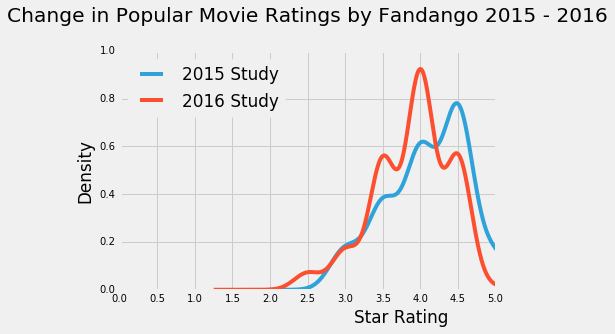

In [64]:
plt.style.use('fivethirtyeight')
fsc_fdg_2015['Fandango_Stars'].plot.kde(x='Star Rating',label='2015 Study',legend=True,fontsize=10)
mr_fdg_2016['fandango'].plot.kde(x='Star Rating',label='2016 Study',legend=True)
plt.xlabel('Star Rating',x=.75)
plt.title('Change in Popular Movie Ratings by Fandango 2015 - 2016',y=1.1)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlim(0,5)


From the graph above we can see a clear difference in the ratings of popular movies by Fandango. The 2016 ratings are shifted left indicating lower ratings than 2015. We can not say with confidence that the change is directly related to the article by Hickey but one might infer that the article influenced Fandango to make a change.

In [78]:
# Lets continue digging a little deeper and look at the normalized frequency tables of the 
# datasets.

freq_2015 = round(fsc_fdg_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100, 1)
freq_2016 = round(mr_fdg_2016['fandango'].value_counts(normalize=True).sort_index() * 100, 1)
print('2015 Ratings Data','\n',freq_2015)
print('\n','2016 Ratings Data','\n',freq_2016)



2015 Ratings Data 
 3.0     8.5
3.5    17.8
4.0    28.7
4.5    38.0
5.0     7.0
Name: Fandango_Stars, dtype: float64

 2016 Ratings Data 
 2.5     3.1
3.0     7.3
3.5    24.1
4.0    40.3
4.5    24.6
5.0     0.5
Name: fandango, dtype: float64


When we look at the normalized frequency tables we see the same thing as in the KDE plot, a downward trend the overall ratings ratings with more ratings culminating around the 3.5 - 4.0 buckets:

Rating | 2016 Result (%) | 2015 Result (%) | Change from 2015 to 2016
-----|-----|-----|-----
2.5 | 3.1 | n/a | 3.1
3.0 | 7.3 | 8.5 | -1.2
3.5 | 24.1 | 17.8 | 6.3
4.0 | 40.3 | 28.7 | 11.6
4.5 | 24.6 | 38.0 | -13.4
5.0 | 0.5 | 7.0 | -6.5

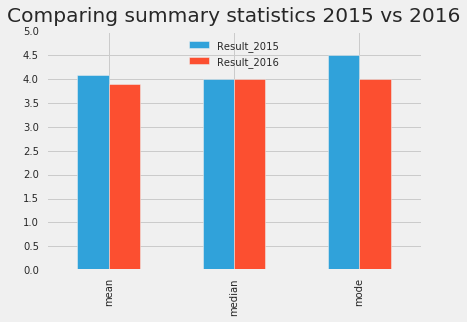

In [112]:
plt.style.use('fivethirtyeight')                            
Result_2015 = [float(fsc_fdg_2015['Fandango_Stars'].mean()),float(fsc_fdg_2015['Fandango_Stars'].median()),float(fsc_fdg_2015['Fandango_Stars'].mode())]
Result_2016 = [float(mr_fdg_2016['fandango'].mean()),float(mr_fdg_2016['fandango'].median()),float(mr_fdg_2016['fandango'].mode())]
index = ['mean','median','mode']
summary_statistics = pd.DataFrame({'Result_2015': Result_2015,
                   'Result_2016': Result_2016}, index=index)

summary_statistics.plot.bar()
plt.title('Comparing summary statistics 2015 vs 2016',y=1.02)
plt.ylim(0,5)
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend(loc='upper center')

    



The summary statistics above tell the same story. A shift down in ratings between 2015 to 2016 although the shift is not huge.